In [1]:
import matplotlib.pyplot as plt

In [2]:
x = [i for i in range(10)]; x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
y = [2*i for i in range(10)]; y

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Text(0, 0.5, 'y')

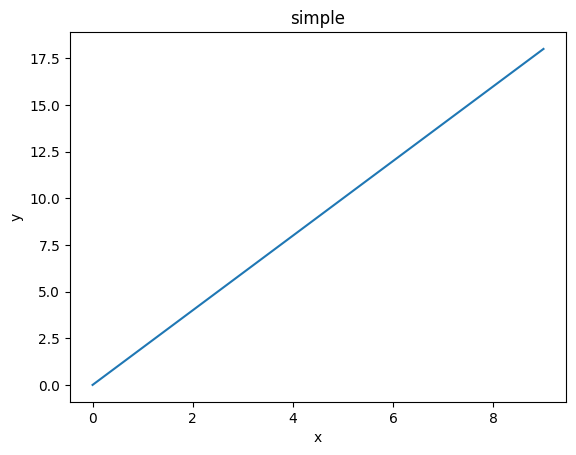

In [4]:
plt.plot(x,y)
plt.title("simple")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

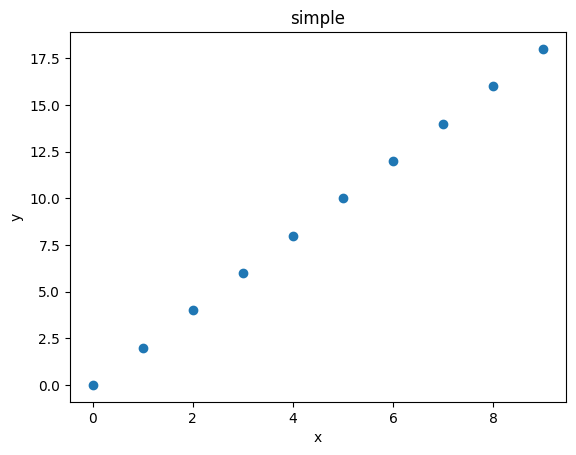

In [5]:
plt.scatter(x,y)
plt.title("simple")
plt.xlabel("x")
plt.ylabel("y")

# are features independent variables  ?
# number of features is called dimension
# features also known as attributes
# labels are dependent variables 
# number of rows is called number of instances

In [6]:
from sklearn import datasets


iris = datasets.load_iris()
x = iris.data
y = iris.target

In [7]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size=0.8)

In [9]:
print(x_train.shape)
print(x_test.shape)   # result is a tuple

(120, 4)
(30, 4)


# KNN classifier (axis are the features )

it separates all the lables in regions 
larger datasets need a larger value for K
for fewer rows , smaller K
use odd number for K to facilitate math 


In [10]:
import pandas as pd

columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv('/home/amir/Documents/4rd_semester/programming/python/car+evaluation/car.data', names=columns)

In [11]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
x = data[['buying', 'maint', 'safety']]
y = data[['class']]
x

,buying,maint,safety
0,vhigh,vhigh,low
1,vhigh,vhigh,med
2,vhigh,vhigh,high
3,vhigh,vhigh,low
4,vhigh,vhigh,med
...,...,...,...
1723,low,low,med
1724,low,low,high
1725,low,low,low
1726,low,low,med


In [13]:
print(x.shape, '  ')

(1728, 3)   


In [14]:
len(x)

1728

## we have all these columns string . so we use label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

lencode = LabelEncoder()

# Encode each categorical column individually
x['buying'] = lencode.fit_transform(x['buying'])
x['maint'] = lencode.fit_transform(x['maint'])
x['safety'] = lencode.fit_transform(x['safety'])


/tmp/ipykernel_204083/2099540139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['buying'] = lencode.fit_transform(x['buying'])
/tmp/ipykernel_204083/2099540139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['maint'] = lencode.fit_transform(x['maint'])
/tmp/ipykernel_204083/2099540139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [16]:
x

,buying,maint,safety
0,3,3,1
1,3,3,2
2,3,3,0
3,3,3,1
4,3,3,2
...,...,...,...
1723,1,1,2
1724,1,1,0
1725,1,1,1
1726,1,1,2


In [17]:
l_mapping = {'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}
y['class'] = y['class'].map(l_mapping)

/tmp/ipykernel_204083/3537954155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(l_mapping)


In [18]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


## now we can create model
# KNN  

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [20]:
# KNN object
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform')

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size=0.8)

In [22]:
x_train.shape

(1382, 3)

In [23]:
knn.fit(x_train, y_train.values.reshape(-1))


KNeighborsClassifier(n_neighbors=25)

In [24]:
predic = knn.predict(x_test)

In [25]:
from sklearn import metrics

accu = metrics.accuracy_score(y_test, predic)
#print("prediction:", predic, '\n')
print("accuracy:", accu)

accuracy: 0.7485549132947977


![knn Logo](https://miro.medium.com/v2/resize:fit:640/format:webp/0*rc5_e6-6AHzqppcr)


In [26]:
print("acutal value:", y.iloc[20])

acutal value: class    0
Name: 20, dtype: int64


In [27]:
print("predicted value:", knn.predict(x)[20])


predicted value: 0


In [28]:
print("Shape of input data:", y.shape)
print("Shape of training data:", knn.predict(x).shape)


Shape of input data: (1728, 1)
Shape of training data: (1728,)


## SVM (maximize the margins) for classification and regression

## we use iris dataset here 

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [30]:
from sklearn import svm
import numpy as np

model = svm.SVC()
y_train = np.ravel(y_train) # to ignore warnings

model.fit(x_train, y_train)

SVC()

In [31]:
predictions = model.predict(x_test)
accu = accuracy_score(y_test, predictions)
accu

0.7369942196531792

## LR

In [32]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection  import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

x = boston.data
y = boston.target
y

/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [33]:
x.shape

(506, 13)

In [34]:
y.shape

(506,)

In [35]:
lreg = linear_model.LinearRegression()
x.T[0].shape

(506,)

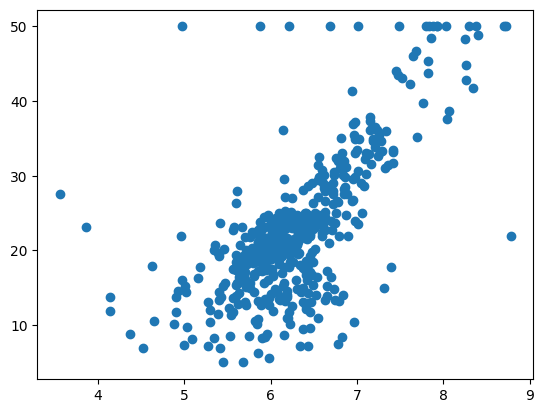

In [36]:
plt.scatter(x.T[5], y)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
model = lreg.fit(x_train, y_train)
predict = model.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predict)

In [40]:
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.622166510612132


In [41]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, predict)

print("R-squared value:", r_squared)


R-squared value: 0.7192581388612111


![metrics](https://miro.medium.com/v2/resize:fit:1200/1*rVTCIffI2D_-i_CGeHwF6A.png)

In [42]:
print(model.coef_)

[-1.23753736e-01  4.29740797e-02  2.31315140e-02  2.03080134e+00
 -1.95946420e+01  3.77327488e+00  6.63476927e-03 -1.51756445e+00
  3.41445954e-01 -1.23226392e-02 -9.85563208e-01  1.08766513e-02
 -5.39548417e-01]


In [43]:
model.intercept_

37.54815820838808

In [44]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


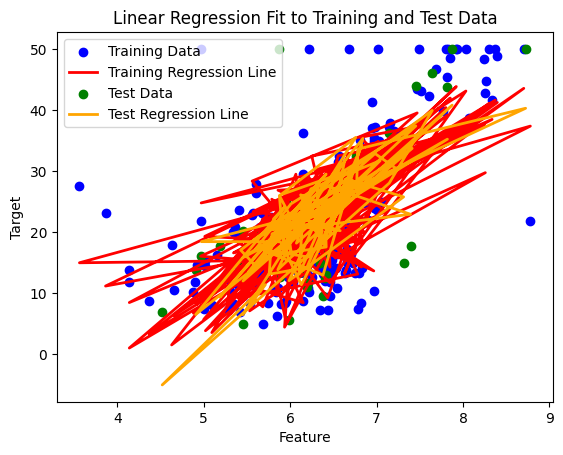

In [45]:
feature_index = 5  

# training data points and regression line
plt.scatter(x_train[:, feature_index], y_train, color='blue', label='Training Data')
plt.plot(x_train[:, feature_index], model.predict(x_train), color='red', linewidth=2, label='Training Regression Line')

# test data points and regression line
plt.scatter(x_test[:, feature_index], y_test, color='green', label='Test Data')
plt.plot(x_test[:, feature_index], model.predict(x_test), color='orange', linewidth=2, label='Test Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit to Training and Test Data')
plt.legend()

plt.show()


## KMeans

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [47]:
bc = load_breast_cancer() # don't forget ()
bc.target
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [48]:
x = scale(bc.data)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [49]:
y = bc.target

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


cluster_labels = model.labels_
centroids = model.cluster_centers_

silhouette = silhouette_score(x_train, cluster_labels)

davies_bouldin = davies_bouldin_score(x_train, cluster_labels)

calinski_harabasz = calinski_harabasz_score(x_train, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.3479751500979622
Davies-Bouldin Index: 1.299572381783712
Calinski-Harabasz Index: 212.4796038020249


## CNN

In [53]:
pip install mnist


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

In [54]:
from PIL import Image
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import mnist

In [55]:
x_train = mnist.train_images()
y_train = mnist.train_labels()

x_test = mnist.test_images()
y_test = mnist.test_labels()

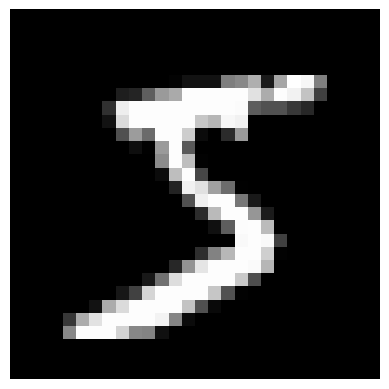

In [56]:
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')  # Optional: turn off axis
plt.show()


In [57]:
print(x_train.shape, '\n', x_test.shape)  # 60,000 samples and each 28 x 28 pixels


(60000, 28, 28) 
 (10000, 28, 28)


## with this dimension we cannot Fetch the images into the CNN

In [58]:
y_train[0]

5

In [59]:
x_train = x_train.reshape(-1, 28*28) # -1 it is similar to use 60,000
x_test = x_test.reshape(-1, 28*28)

## CNN works better with numbers form -1 to 1  OR 0 to 1. so let's normalize the pixeles

In [60]:
x_train = x_train /256
x_test = x_test/256
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes = (64, 64))


clf.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 64))

In [62]:
predi = clf.predict(x_test )

In [64]:
accu = confusion_matrix(y_test, predi)
accu

array([[ 969,    0,    1,    2,    0,    0,    3,    1,    3,    1],
       [   0, 1123,    2,    2,    0,    0,    2,    1,    5,    0],
       [   4,    2, 1013,    3,    1,    0,    1,    4,    4,    0],
       [   0,    0,    4,  991,    0,    6,    0,    2,    5,    2],
       [   2,    0,    2,    0,  959,    0,    7,    2,    1,    9],
       [   2,    0,    1,   11,    2,  861,    3,    2,    6,    4],
       [   7,    3,    0,    1,    4,    6,  935,    0,    2,    0],
       [   1,    4,    7,    2,    2,    0,    0, 1000,    8,    4],
       [   7,    0,    1,    3,    3,    3,    2,    4,  946,    5],
       [   2,    2,    0,    6,    7,    3,    2,    6,    2,  979]])

In [74]:
def accuracy(c_matrix):
    diagonal = c_matrix.trace()
    sum_elements = c_matrix.sum()
    return diagonal/sum_elements

In [75]:
print(accuracy(accu))

0.9776
